# Seaborn lecture

1. Creating plots with Seaborn
2. Plotting 1-dimensional data (i.e., 1 column)
3. Plotting 2-dimensional data (i.e., 2 columns)
4. Histograms, boxplots, violin plots, scatter plots, heatmaps, etc

Seaborn is visualization library based on matplotlib. In some ways, seaborn is like going to a restaurant and ordering food, whereas matplotlib is like going to the grocery store and making the food yourself.

Let's start with our normal imports (numpy, pandas)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# https://seaborn.pydata.org/

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's focus first on plotting a histogram, which is useful for looking at 1 dimensional continuous or discrete data. 

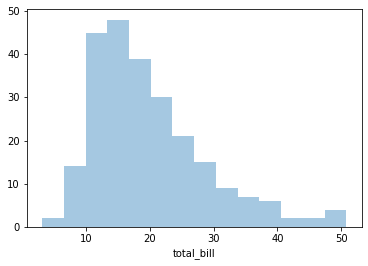

In [ ]:
sns.distplot(tips['total_bill'],kde=False)

This is just a histogram. The height of each column corresponds to the number of instances of the data within that bin

E.g., let's see how many times the total_bill was above 40


In [ ]:
sum(tips['total_bill']>40)


10

Now, let's change the bins so that we go from 0 to 20, 20 to 40, and 40 to 60

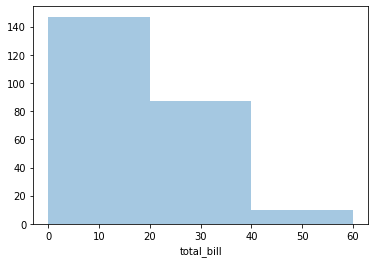

In [ ]:
sns.distplot(tips['total_bill'],kde=False,bins = [0,20,40,60])

A little hard to see, but we can change the ylims (i.e., the dimensions of the yaxis) to zoom in a bit

(0.0, 15.0)

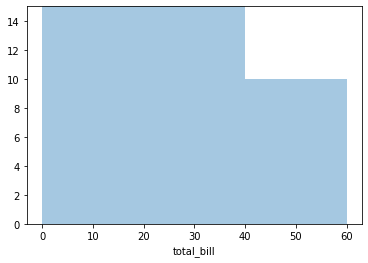

In [ ]:
sns.distplot(tips['total_bill'],kde=False,bins = [0,20,40,60])
plt.ylim([0,15])

If you don't want to input the exact bins, you can just tell it how many bins you want


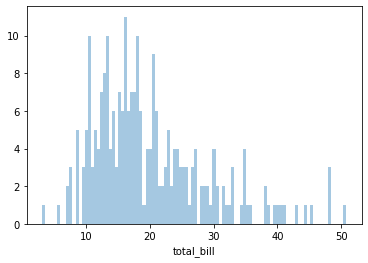

In [ ]:
sns.distplot(tips['total_bill'],kde=False,bins=100)

Figuring out the best bin size is a balancing act. Too many/few bins = hard to see any patterns in the data.

It helps to choose sensible bins based on your data. Here, I've now binning by 2.50 dollars, which looks alright. 

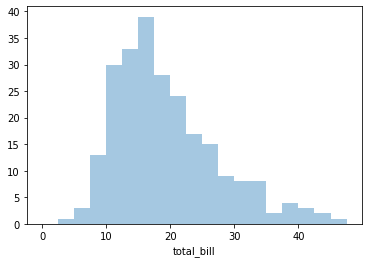

In [ ]:
sns.distplot(tips['total_bill'],kde=False,bins=np.arange(0,50,2.5))

#### In case you were curious, if remove the kde=False portion, it plots this kernal density estimate.

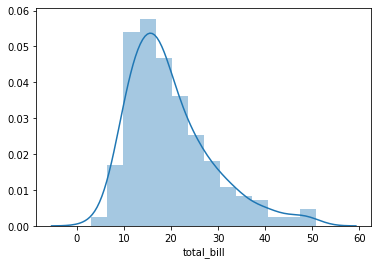

In [ ]:
sns.distplot(tips['total_bill'])

If you like the kernal density estimate, it could always just be used by itself

KDE is like basically a way to create a probability density function. That is why the y-axis changes to a percentage. 

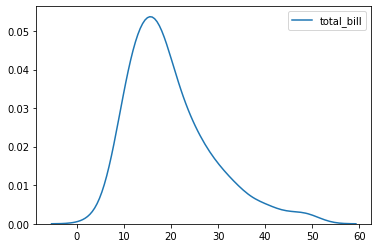

In [ ]:
sns.kdeplot(tips['total_bill'])

For more details on what kernal density estimation, I suggest checking out the wikipedia page https://en.wikipedia.org/wiki/Kernel_density_estimation

If you have multiple categories for your data, it is helpful to view them with boxplots.

The categories could be categorical (e.g., like 'day') or discrete (e.g., like 'size'). Continuous data (e.g., like 'tip') would work too, but its not a wise choose

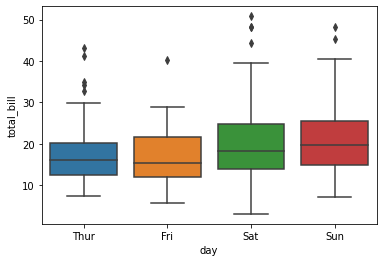

In [ ]:
sns.boxplot(x='day',y='total_bill',data=tips)

Here, the whiskers (which is why its called a box and whisker plot) have specific meanings

I've basically rotated the box plot and have changed the tick marks at the bottom to demonstrate the shape of the boxplot

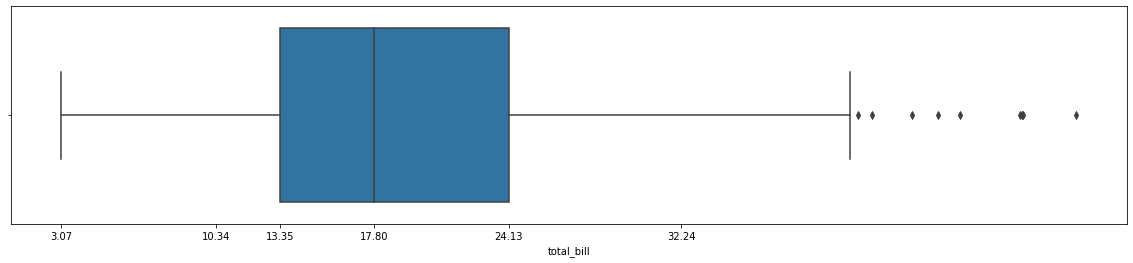

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [ ]:
plt.figure(figsize=[20,4])
sns.boxplot(x='total_bill',data=tips)
tips['total_bill'].describe()
plt.xticks(ticks=np.percentile(tips['total_bill'],[0,10,25,50,75,90]))
plt.show()
tips['total_bill'].describe()

While box plots are great, they don't really tell you much about the shape of the distribution. One way to do that is to show kernal density estimates for each category

That is what a violinplot is. 

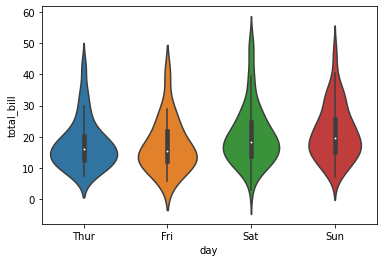

In [ ]:
sns.violinplot(x='day',y='total_bill',data=tips)

One of the nice features of seaborn is that many plots take a hue input, which adds another categorical dimension to our plot

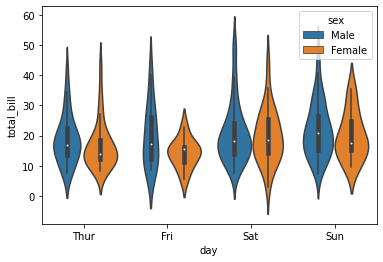

In [ ]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

Since the Day category is shared between Sex, you can actually split the violins with Sex appearing as the different sides of the violin

Note that split only works when there are two categories

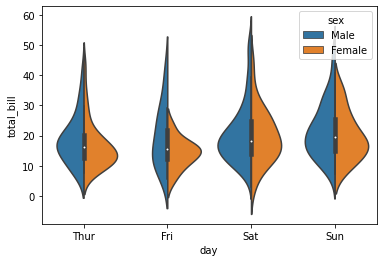

In [ ]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

Since these are kernal density estimates, the shape integrates to 1. So, it could be that some of these curves have way more data than another. It may help to change the scale.

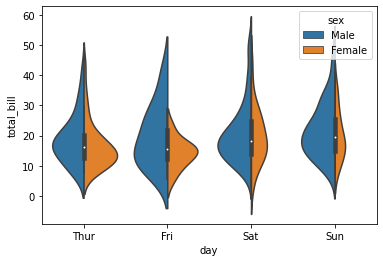

In [ ]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True,scale='count')

One potential problem with box and violin plots is that you still aren't really seeing the data

You can do that with a stripplot. Each data point is plotted with a little random noise around it

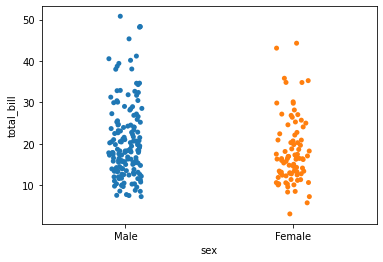

In [ ]:
sns.stripplot(x='sex',y='total_bill',data=tips)

Or, if you want these dots to not be randomly distributed, you can use a swarm plot

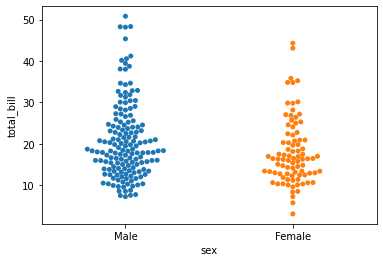

In [ ]:
sns.swarmplot(x='sex',y='total_bill',data=tips)

*What previous plot does this swarm plot look like?*

Correct! A violinplot. You can put them on top of each other to get a pretty cool looking plot


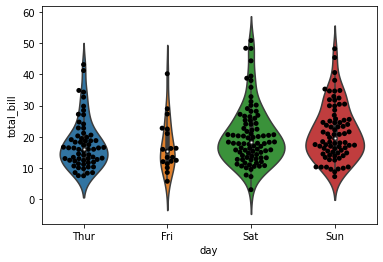

In [ ]:
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')
sns.violinplot(x='day',y='total_bill',data=tips,scale='count')

Let's talk a little bit about plotting 2 columns of data against each other

You can do this with a lineplot

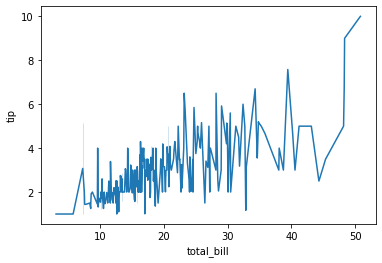

In [ ]:
sns.lineplot(tips['total_bill'],tips['tip'])

Doesn't make a lot of sense  because order doesn't matter in our original data set. 

Scatter plots are usually the better option in most cases we will deal with

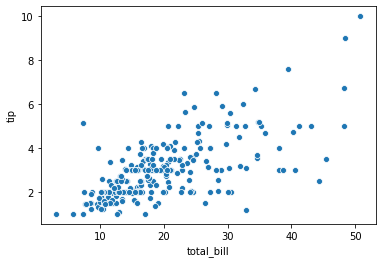

In [ ]:
sns.scatterplot(tips['total_bill'],tips['tip'])

#### These appears to be a strong relationship between the amount of the total bill and the amount of the tip.

#### Later, we will explore how to evaluate and model this relationship. We can show that relationship in our plots using lmplot

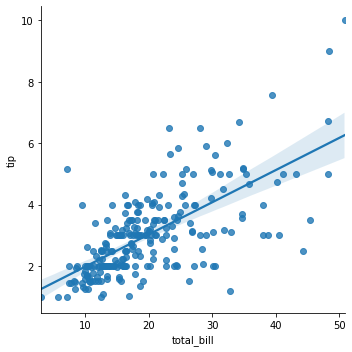

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips)

Just like with the violinplots, we can add a hue input to add another categorical variable

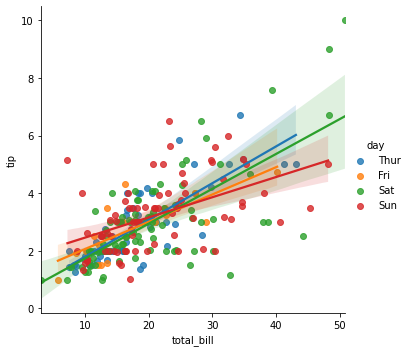

In [ ]:
sns.lmplot(x='total_bill',y='tip',data = tips,hue='day')

Here, we've plotted two continuous variables. You could always put discrete values as the x axis

But as you can see, it doesn't look great when there are just a few discrete options. 

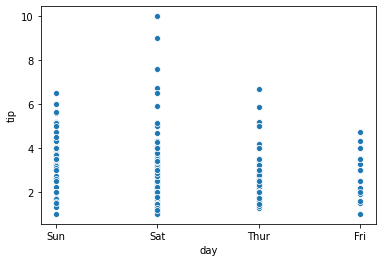

In [ ]:
sns.scatterplot(tips['day'],tips['tip'])

Next, let's look at heatmaps briefly. They are basically like 3 dimensional histograms, but instead of showing the height, the color of the bin itself is changed

Lets look at this using the flights dataset

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


I'm going to change the format of this data into a pivottable, where each index is a month and each column is a year, with the cells being the number of passengers

In [ ]:
fpt = flights.pivot_table(index='month',columns='year',values='passengers')
print(fpt)

year       1949  1950  1951  1952  1953  ...  1956  1957  1958  1959  1960
month                                    ...                              
January     112   115   145   171   196  ...   284   315   340   360   417
February    118   126   150   180   196  ...   277   301   318   342   391
March       132   141   178   193   236  ...   317   356   362   406   419
April       129   135   163   181   235  ...   313   348   348   396   461
May         121   125   172   183   229  ...   318   355   363   420   472
June        135   149   178   218   243  ...   374   422   435   472   535
July        148   170   199   230   264  ...   413   465   491   548   622
August      148   170   199   242   272  ...   405   467   505   559   606
September   136   158   184   209   237  ...   355   404   404   463   508
October     119   133   162   191   211  ...   306   347   359   407   461
November    104   114   146   172   180  ...   271   305   310   362   390
December    118   140   1

We can then look at the heatmap of the number of passengers per cell

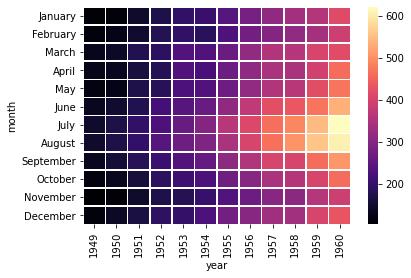

In [ ]:
sns.heatmap(fpt,cmap='magma',linecolor='white', linewidth=.5)

Heatmaps are especially useful when dealing with multidimensional data. For example, you've probably seen contour plots, which represent things like height on a map. Heatmap have even been used to find treasure:

https://en.wikipedia.org/wiki/Bayesian_search_theory

https://www.nps.edu/documents/103424533/106018074/Bayes+Search+for+Missing+Aircraft+NPS+20+Apr+2017.pdf/051a76bc-18cc-47a7-b8b8-52d92d618dfe


Let's step away from heatmaps for a second and learn some cool seaborn tricks. 

The first is helpful in quickly visualizing a dataframe. Its called a pairplot

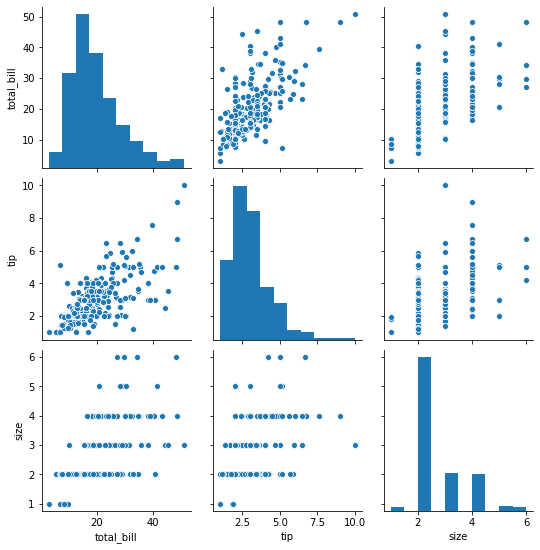

In [ ]:
sns.pairplot(tips)

Pairplots show you a histogram of your data column on the diagnol and a scatter on the non-diagnols. So, we could quickly seethat tip and total bill are related, but that size is less related to tip and total bill

*But, what's missing from the pairplot?*

Correct. The categorical variables. That makes sense because you can't really do a histogram or scatteplot of, say, Male/Female.

You can tun them into a hue though

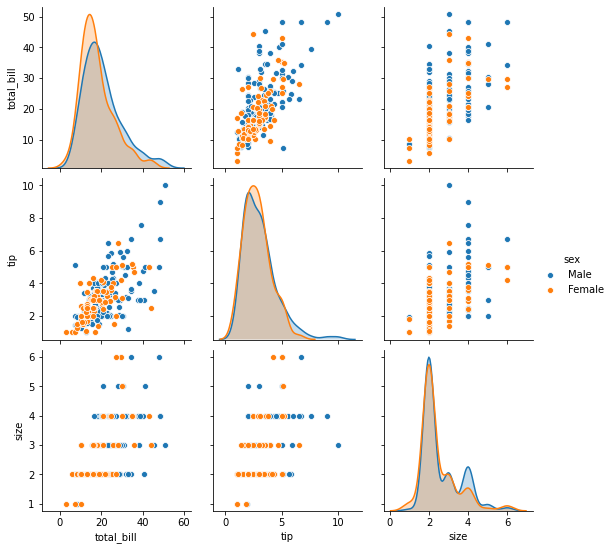

In [ ]:
sns.pairplot(tips,hue='sex')

*This changes the diagnoal from a histogram to what?* A KDE plot

There are ways to change and manipulate how these figures look. See here:

https://seaborn.pydata.org/generated/seaborn.pairplot.html


The next thing I want to briefly discuss is something called a jointplot

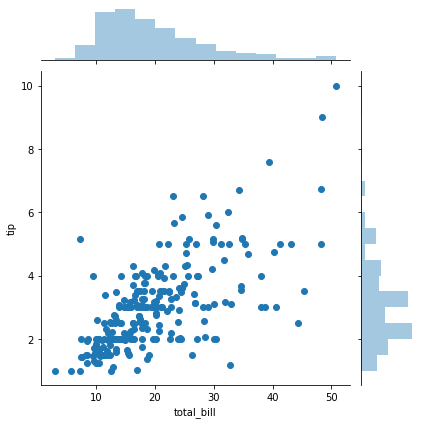

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips)

*Can anyone guess what this is displaying?*

Correct. A scatterplot with the respective histograms on the sides. Its almost like taking a chunk out of the pairplot.



There are a couple of different kinds of jointplot visualizations, if you are interested

Hex is basically doing a heatmap on the data, but instead of square bins, the bins are shaped like hexagons

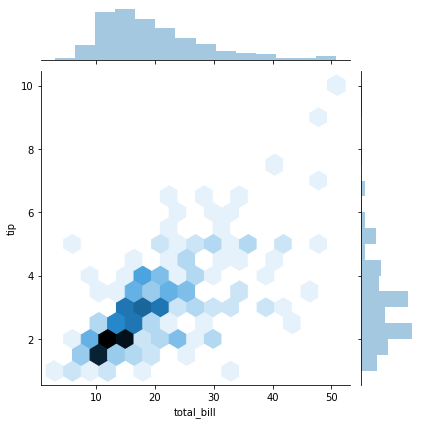

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

You can also apply a kernal density estimate, which looks pretty cool

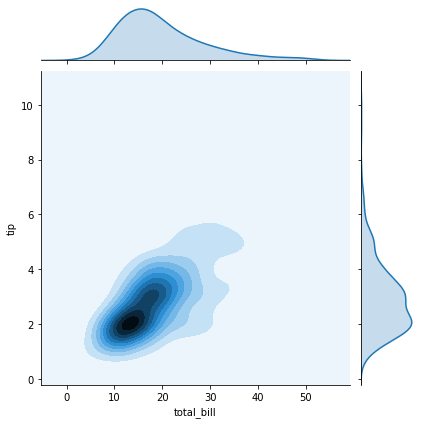

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

You can add data points to his using the plot_joint method of the jointplot function

plot_joint specifically refers to the plot in the middle (i.e., the scatter plot)

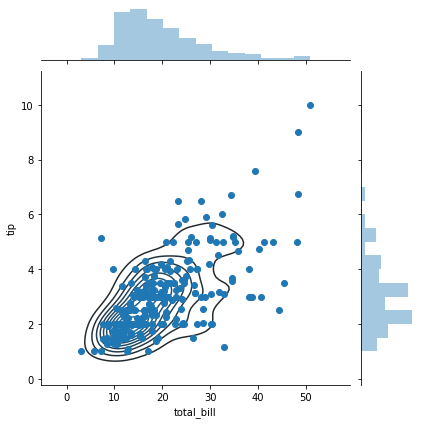

In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips).plot_joint(sns.kdeplot, zorder=0, n_levels=10)

*Most of this has been what kind of plotting?*

Correct. Functional

We can do object oriented plotting in seaborn pretty easily

Let's first create some subplots

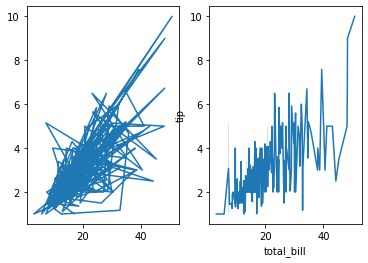

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2) 

axes[0].plot(tips['total_bill'],tips['tip'])
sns.lineplot(tips['total_bill'],tips['tip'],ax=axes[1]) # this is how we choose which axis using seaborn

One last thing. How do we change the visualization of our seaborn figures? 

Well, we do the same thing we did with the matplotlib figures

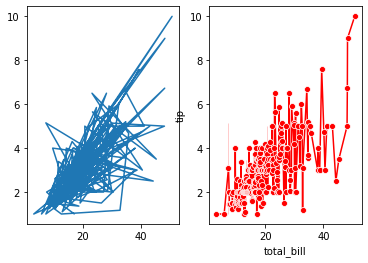

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2) 

axes[0].plot(tips['total_bill'],tips['tip'])
sns.lineplot(tips['total_bill'],tips['tip'],ax=axes[1],color='r',marker='o') # this is how we choose which axis using seaborn

Next week, we will discuss how to import (loading csv, web scraping) and export (save) data